In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import math

In [45]:
%matplotlib inline


In [3]:
summary = pd.read_csv("atusdata/atussum_2013.dat")
summary.info()

summary.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 36.0 MB


,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
0,20130101130004,11899905.662034,12,22,2,40,8,2,1,5,...,0,0,0,0,0,0,0,0,0,0
1,20130101130112,4447638.009513,1,39,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,25,0,0,0,0,0,0,0,0,0
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
summary[["TUFINLWGT","TESEX"]].head()


,TUFINLWGT,TESEX
0,11899905.662034,2
1,4447638.009513,1
2,10377056.507734,2
3,7731257.992805,2
4,4725269.227067,2


In [5]:
summary.TUDIARYDAY.describe()

count    11385.000000
mean         3.929029
std          2.342859
min          1.000000
25%          1.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: TUDIARYDAY, dtype: float64

In [6]:
resp = pd.read_csv("atusdata/atusresp_2013.dat")
resp.head()

,TUCASEID,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,...,TXSPEMPNOT,TXSPUHRS,TXTCC,TXTCCTOT,TXTCOC,TXTHH,TXTNOHH,TXTO,TXTOHH,TXTONHH
0,20130101130004,1,2013,1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,0,0,0,-1,-1,-1
1,20130101130112,1,2013,1,-1,-1,-1,-1,-1,2,...,0,0,0,0,0,0,-1,0,0,-1
2,20130101130123,1,2013,1,-1,-1,-1,-1,-1,-1,...,0,0,-1,0,0,-1,-1,-1,-1,-1
3,20130101130611,1,2013,1,-1,-1,-1,-1,-1,2,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,20130101130616,1,2013,1,-1,-1,-1,-1,-1,2,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1


In [7]:
resp.TRTALONE.describe()

count    11385.000000
mean       316.122178
std        269.888458
min          0.000000
25%         95.000000
50%        240.000000
75%        483.000000
max       1440.000000
Name: TRTALONE, dtype: float64

In [8]:
#rost = pd.read_csv("atusdata/atusrost_2013.dat")
#who = pd.read_csv("atusdata/atuswho_2013.dat")
#rostec = pd.read_csv("atusdata/atusrostec_2013.dat")
#cps = pd.read_csv("atusdata/atuscps_2013.dat")
#act = pd.read_csv("atusdata/atusact_2013.dat")

In [9]:
summary = summary.rename(columns={"t010101": "SLEEPING", 'tucaseid': 'ID', 
                                  'TEAGE': 'AGE', 't080601': 'BUYING_REALESTATE',
                                 "t110101": "EATING_DRINKING", 't130116': 'HIKING',
                                'TESEX': "GENDER", 't120307': 'Playing_Games',
                                'TUFINLWGT': 'WEIGHT', 't120303': 'MINUTES'
                                 })
summary['Weighted_Minutes'] = summary.WEIGHT * summary.MINUTES


# START

In [11]:
my_frame = summary[["ID", "AGE", "GENDER", 'HIKING']]
my_frame.head()

,ID,AGE,GENDER,HIKING
0,20130101130004,22,2,0
1,20130101130112,39,1,0
2,20130101130123,47,2,0
3,20130101130611,50,2,0
4,20130101130616,45,2,0


## According to the data time spent hiking goes down with age

In [12]:
my_frame.describe()

,ID,AGE,GENDER,HIKING
count,1.138500e+04,11385.000000,11385.000000,11385.000000
mean,2.013064e+13,48.279842,1.553623,0.247519
std,3.517213e+08,17.909707,0.497138,6.945454
min,2.013010e+13,15.000000,1.000000,0.000000
25%,2.013030e+13,34.000000,1.000000,0.000000
50%,2.013061e+13,48.000000,2.000000,0.000000
75%,2.013091e+13,62.000000,2.000000,0.000000
max,2.013121e+13,85.000000,2.000000,340.000000


In [13]:
hikers = (my_frame.HIKING > 1)

In [14]:
hike_frame = my_frame[hikers]

hike_frame = hike_frame.replace({'GENDER': {1: 'Male', 2: 'Female'}})
hike_frame = hike_frame.sort(columns='AGE')

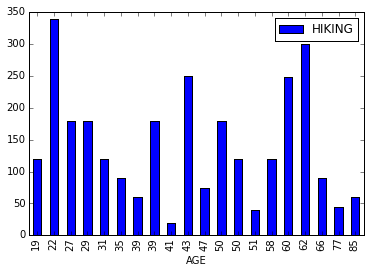

In [15]:
hike_frame.plot('AGE', 'HIKING', kind='bar')

### Sample size is too small to make any conclusions

In [16]:
summary.head()

,ID,WEIGHT,TRYHHCHILD,AGE,GENDER,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107,Weighted_Minutes
0,20130101130004,11899905.662034,12,22,2,40,8,2,1,5,...,0,0,0,0,0,0,0,0,0,3.926969e+09
1,20130101130112,4447638.009513,1,39,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,4.225256e+08
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,0,0,0,0,0,0,0,0,0,6.226234e+08
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,0,0,0,0,0,0,0,5.025318e+08
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,0,0,0,0,0,4.252742e+08


In [17]:
summary =  summary.rename(columns={'t120301': 'THINKING', 't120302': 'TOBBACO_OR_DRUGS'})
summary = summary.replace({'GENDER': {1: 'Male', 2: 'Female'}})


In [18]:
drugs_and_thought = summary[['THINKING', 'TOBBACO_OR_DRUGS']]
thoug = (drugs_and_thought.TOBBACO_OR_DRUGS > 1)
drugs_and_thought = drugs_and_thought[thoug]
drug = (drugs_and_thought.THINKING > 1)
drugs_and_thought = drugs_and_thought[drug]
drugs_and_thought.head()


,THINKING,TOBBACO_OR_DRUGS
158,10,10
581,128,48
946,30,13
1719,60,20
1769,60,20


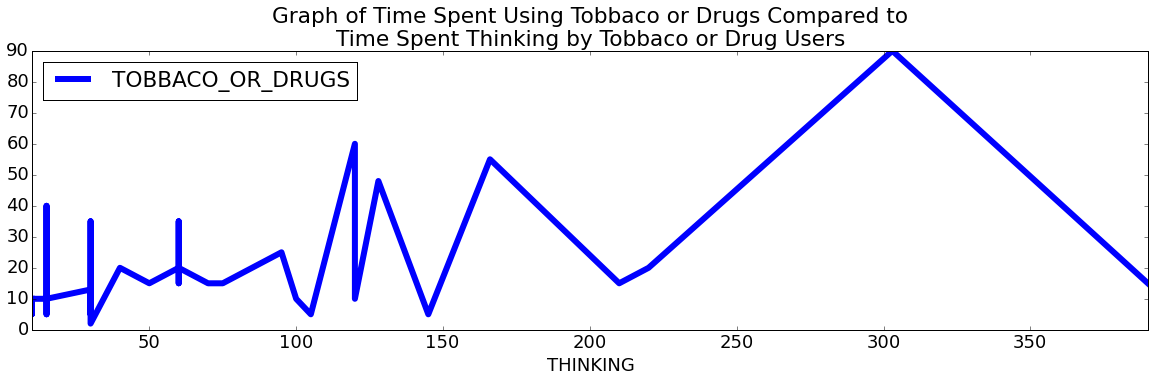

In [19]:
plt.rcParams.update({'font.size': 18})
sorted_tobt = drugs_and_thought.sort(columns='THINKING')
sorted_tobt.plot(x='THINKING', y='TOBBACO_OR_DRUGS', title='Graph of Time Spent Using Tobbaco or Drugs Compared\
 to \nTime Spent Thinking by Tobbaco or Drug Users', figsize=(20,5),linewidth=6)

In [20]:
d = [
    {"id": "1", "sex": "female", "drug": 10}, 
    {"id": "2", "sex": "female", "drug": 0},
    {"id": "3", "sex": 1, "drug": 50}, 
    {"id": "4", "sex": "female", "drug": 0},
    {"id": "5", "sex": "female", "drug": 20}, 
    {"id": "6", "sex": "female", "drug": 200},
]
df = pd.DataFrame(d)
gender_count_series = pd.DataFrame(d).sex.value_counts()
df.index = df.pop("id")

In [21]:
male_drug_use = df[df.sex == 1].drug.sum()
female_drug_use = df[df.sex == "female"].drug.sum()

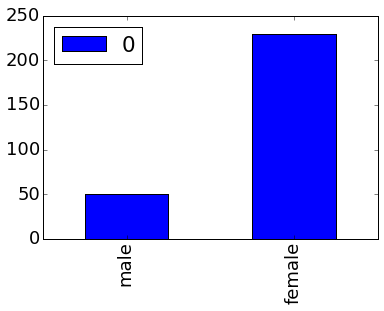

In [22]:
pd.DataFrame([male_drug_use, female_drug_use], index=["male", "female"]).plot(kind="bar")

In [87]:
def stdev_minutes(data, activity_l):
    data_mean = average_minutes(data, activity_col)
    num_non0_obs = summary[summary.TUFINLWGT != 0].TUFINLWGT.count()
    data = data.rename(columns={"WEIGHT": "weight", activity_col: "minutes"})
    data = data[["weight", "minutes"]]
    data['weighted_ss'] = data.weight * (data.minutes - data_mean)**2
    return math.sqrt(data.weighted_ss.sum()/(((num_non0_obs-1)/num_non0_obs)*data.weight.sum()))

def average_minutes(data, activity_col):
    data = data.rename(columns={"WEIGHT": "weight", activity_col: "minutes"})
    data = data[['weight', "minutes"]]
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

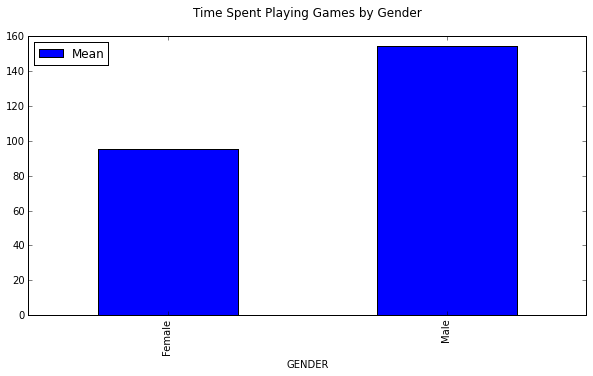

In [112]:
games = summary[['GENDER','Playing_Games', 'WEIGHT', 'Weighted_Minutes']]
g_bool = (summary.Playing_Games > 0)
games = games[g_bool]
grouped_games = games.groupby('GENDER')

empty = pd.DataFrame()

for group in grouped_games:
    count = group[1].Weighted_Minutes.count()
    Play = sum(group[1].Playing_Games)
    mean = average_minutes(group[1], 'Playing_Games')
    empty = empty.append({"GENDER": group[0], "Mean": mean}, ignore_index=True)

    
empty.index = empty.pop('GENDER')
empty.plot(kind='bar', figsize=(10,5), title='Time Spent Playing Games by Gender\n', )


##This graph shows the amount of reported minutes of time spent playing games by gender